In [4]:
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.To_Draw import Draw_theoretical_wData as DD
from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_init_pvel as Hp 
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm import tqdm
import parmap
from TO_sim.Hysteresis_Kuramoto import *
from TO_sim.gen_Distribution import *
from TO_sim.For_ensemble.for_221220 import get_tr
from TO_sim.Utility import Create_Folder

In [ ]:
import time

In [5]:
N = 500
seed = 'uniform'
theta_init, omega_init, Kc = Identical(N, 0, seed=seed)
_,dtheta_init,_ = Lorentzian(N,0,1,seed=0)
K = 0.1
m = 3
t_end = 2000
dt = 0.1

In [13]:
import multiprocessing as mp
core = mp.cpu_count()

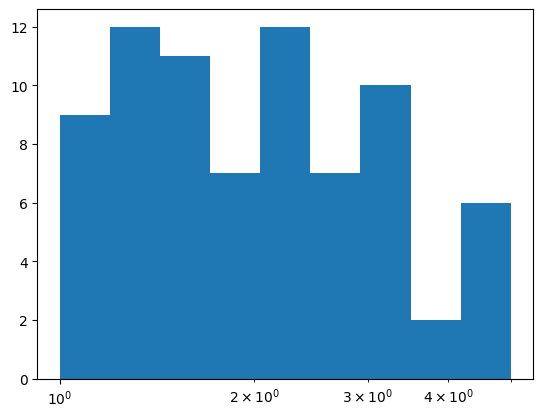

In [12]:
plt.hist(dtheta_init,bins = np.logspace(np.log10(1),np.log10(5),10))
plt.xscale('log')

In [ ]:
Ks = np.logspace(np.log10(1e-2),np.log10(1),3)


# Ks = np.arange(0.1,1.05,0.1)
ms = np.arange(0,24+0.5/2,0.5)
IDX1 = [K for K in Ks for _ in range(len(ms))]
IDX2 = [m for _ in range(len(Ks)) for m in ms ]
IDX = [IDX1,IDX2]
df = pd.DataFrame(np.random.rand(len(Ks)*len(ms),2), index=IDX,columns=['t','r'],dtype=object)
seed = 10
initial_frequecny = 0
for K in tqdm(Ks):
    for m,(df.loc[K,m].t,df.loc[K,m].r) in zip(ms,parmap.map(get_tr,ms,t_end=t_end,K=K,seed=seed,initial_speed=initial_frequecny,pm_processes=core,pm_pbar=False)):pass

In [15]:
ms = np.arange(0,24+0.5/2,0.5)
ts = {}
rs = {}
seed = 10
initial_frequecny = 0
for m,(ts[m],rs[m]) in zip(ms,parmap.map(get_tr,ms,K=K,seed=seed,initial_speed=initial_frequecny,pm_processes=core,pm_pbar=True)):pass

  0%|          | 0/49 [00:00<?, ?it/s]

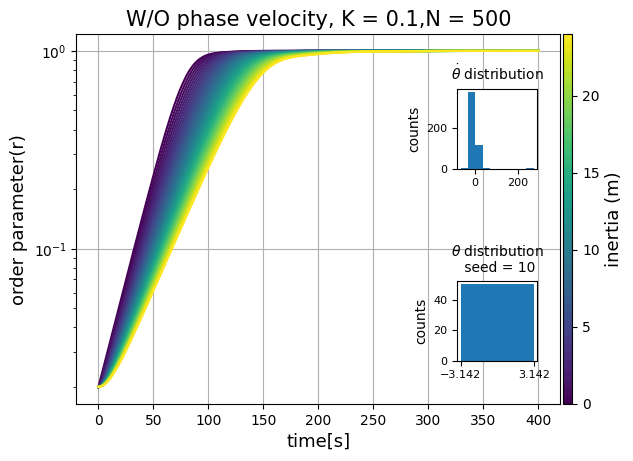

In [16]:
fig = plt.figure(facecolor='white')
ax1 = plt.subplot(111)
color_idx = np.linspace(0.0,1,len(ms))
color = plt.cm.viridis(color_idx)
sca = plt.scatter(0*ms,0*ms,s=0,c=ms)
for i,(t,r) in enumerate(zip(ts.values(),rs.values())):
    plt.plot(t,r,color=color[i],alpha=1)
# plt.xscale('log')
plt.yscale('log')
plt.title(f'W/O phase velocity, K = {K},N = {N}',fontsize=15)
plt.grid()
plt.xlabel('time[s]',fontsize=13)
plt.ylabel('order parameter(r)',fontsize=13)
fig.add_axes([0.72, 0.2, 1/8, 1/6]) 
plt.hist(theta_init)
plt.xticks([-np.pi,np.pi])
plt.title(r'$\theta$ distribution'+f'\n seed = {seed}',fontsize=10)
plt.ylabel('counts')
plt.tick_params(labelsize=8)

ax=fig.add_axes([0.72, 0.6, 1/8, 1/6]) 
ax.set_facecolor('white')
plt.hist(dtheta_init)
plt.title(r'$\dot{\theta}$ distribution',fontsize=10)
plt.ylabel('counts')
plt.tick_params(labelsize=8)

divider3 = make_axes_locatable(ax1)
cax = divider3.append_axes("right", size="2%", pad="0.5%")
cbar = fig.colorbar(sca, cax=cax)
cbar.set_label('inertia (m)',fontsize=13)

# plt.savefig(DF+f'Identical oscillator linear-log without phase velocity seed = {seed} m = [{ms[0],ms[-1]}].png',dpi=400)
# ax1.set_yscale('linear')
# plt.savefig(DF+f'Identical oscillator without phase velocity seed = {seed} m = [{ms[0],ms[-1]}].png',dpi=400)
# plt.scatter(np.sin(theta_init[::]),np.cos(theta_init[::]),alpha=0.5,s=5)
